In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

# Chemin vers le répertoire des données d'entraînement
data_dir = r'C:\Users\33658\Documents\DataSet'

batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 176 files belonging to 2 classes.
Using 141 files for training.
Found 176 files belonging to 2 classes.
Using 35 files for validation.
['Sandra Bullock Crop', 'Tom Hanks Crop']


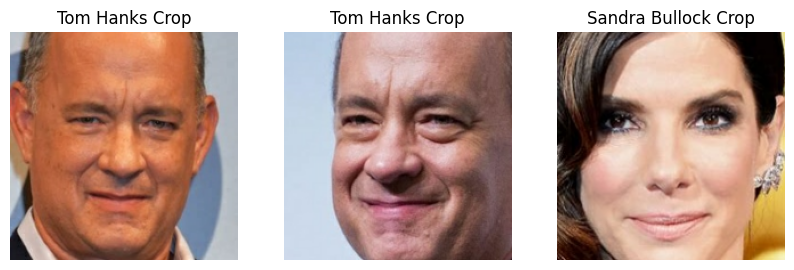

In [115]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [116]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

num_classes = 2

# Définir le modèle avec une couche Input
model = tf.keras.Sequential([
    layers.Input(shape=(200, 200, 3)),  # Couche d'entrée explicite
    layers.Rescaling(1./255),          # Normalisation des données
    layers.Conv2D(128, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compilation
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),  # since softmax is used
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# TensorBoard Callback
logdir = "logs"
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=logdir,
    histogram_freq=1,
    write_images=True,  # Sauvegarder les images
)

# Entraînement
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.5159 - loss: 0.7137 - val_accuracy: 0.4286 - val_loss: 0.7686
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.6997 - loss: 0.5980 - val_accuracy: 0.9143 - val_loss: 0.3279
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8261 - loss: 0.3859 - val_accuracy: 0.7714 - val_loss: 0.5006
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9404 - loss: 0.2597 - val_accuracy: 0.9143 - val_loss: 0.5262
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.9352 - loss: 0.1610 - val_accuracy: 0.9143 - val_loss: 0.5300
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 154ms/step - accuracy: 0.9828 - loss: 0.0497 - val_accuracy: 0.9143 - val_loss: 0.9153
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - accuracy: 0.9981 - loss: 0.0105 - val_accuracy: 0.9143 - val_loss: 0.8399


In [117]:
model.summary()
val_loss, val_accuracy = model.evaluate(train_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_17 (Rescaling)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 197, 197, 128)  │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (None, 98, 98, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 95, 95, 64)     │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 47, 47, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 44, 44, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 19, 19, 16)     │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 9, 9, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 1296)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │        83,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 790,712 (3.02 MB)

 Trainable params: 263,570 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 527,142 (2.01 MB)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8586 - loss: 0.2766
Validation Loss: 0.28794655203819275
Validation Accuracy: 0.8510638475418091


In [118]:
# Sauvegarder le modèle en format natif Keras
model.save("my_model.keras")
print("Modèle sauvegardé sous 'my_model.keras'")


Modèle sauvegardé sous 'my_model.keras'


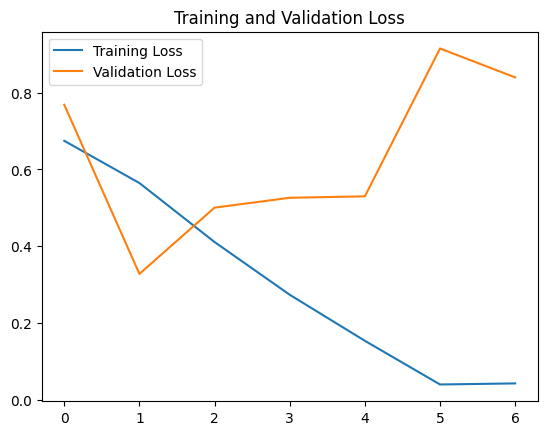

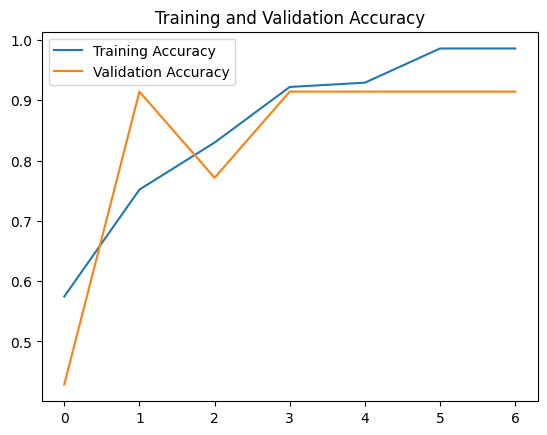

In [119]:
import matplotlib.pyplot as plt

# Courbe de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Courbe de précision (si surveillée)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()


In [122]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model_path = "my_model.keras"  # Remplacez par le chemin vers votre fichier de modèle
model = load_model(model_path)
print("Modèle chargé avec succès.")

# Classes
class_names = ['Sandra Bullock Crop', 'Tom Hanks Crop']  # Remplacez par vos classes

# Chemin du dossier contenant les images
input_dir = r"C:\Users\33658\Documents\DataSet\Tom Hanks Crop"  # Remplacez par le chemin de votre dossier

# Prétraitement d'une image
def preprocess_image(image_path, target_size=(200, 200)):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Erreur : Impossible de charger l'image depuis {image_path}")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB si nécessaire
    image = cv2.resize(image, target_size)  # Redimensionner
    image = image / 255.0  # Normalisation
    image = np.expand_dims(image, axis=0)  # Ajouter une dimension batch
    return image

# Parcourir le dossier et évaluer les images
def evaluate_folder(input_dir, class_names, model, target_size=(200, 200)):
    total_images = 0
    correct_predictions = 0

    # Parcourir les fichiers du dossier
    for file_name in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file_name)

        # Vérifier si le fichier est une image
        if os.path.isfile(file_path) and file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Extraire la classe réelle depuis le nom du fichier (par exemple, "Tom Cruise" dans le chemin)
            true_class = class_names.index(os.path.basename(input_dir))
            # Prétraiter l'image
            img = preprocess_image(file_path, target_size)
            if img is None:
                continue

            # Prédiction
            predictions = model.predict(img)
            predicted_class = np.argmax(predictions)

            # Comparer la prédiction avec la classe réelle
            if predicted_class == true_class:
                correct_predictions += 1
            total_images += 1

            # Afficher les résultats pour l'image
            confidence = np.max(predictions)
            print(f"Image : {file_name}")
            print(f"Classe réelle : {class_names[true_class]}")
            print(f"Classe prédite : {class_names[predicted_class]}")
            print(f"Confiance : {confidence:.2f}")
            print("-" * 50)

    # Résumé des résultats
    accuracy = (correct_predictions / total_images) * 100 if total_images > 0 else 0
    print(f"Total d'images évaluées : {total_images}")
    print(f"Prédictions correctes : {correct_predictions}")
    print(f"Précision globale : {accuracy:.2f}%")

# Exemple d'utilisation
evaluate_folder(input_dir, class_names, model)


Modèle chargé avec succès.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Image : 001_986d6c22_face_1.jpg
Classe réelle : Tom Hanks Crop
Classe prédite : Sandra Bullock Crop
Confiance : 0.66
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image : 002_f6b26479_face_1.jpg
Classe réelle : Tom Hanks Crop
Classe prédite : Sandra Bullock Crop
Confiance : 0.66
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image : 003_21d0aae6_face_1.jpg
Classe réelle : Tom Hanks Crop
Classe prédite : Sandra Bullock Crop
Confiance : 0.66
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image : 004_a5881d85_face_1.jpg
Classe réelle : Tom Hanks Crop
Classe prédite : Sandra Bullock Crop
Confiance : 0.66
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image : 005_dac94cfe_face_1.jpg
Classe réelle : Tom Hanks Crop
Classe prédite : Sandra Bullock Crop
Confiance :